In [1]:
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
covid_data = pd.read_csv("Covid Dataset.csv")

In [3]:
covid_data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [4]:
covid_data.shape

(5434, 21)

In [5]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [6]:
covid_data.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [7]:
# create a table with data missing 
missing_values=covid_data.isnull().sum() # missing values

percent_missing = covid_data.isnull().sum()/covid_data.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


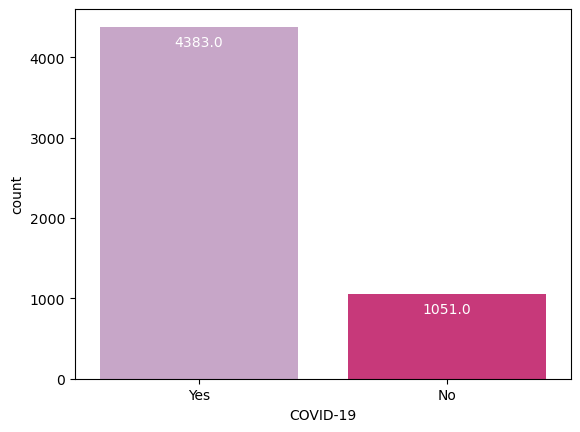

In [10]:
ax = sns.countplot(x='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

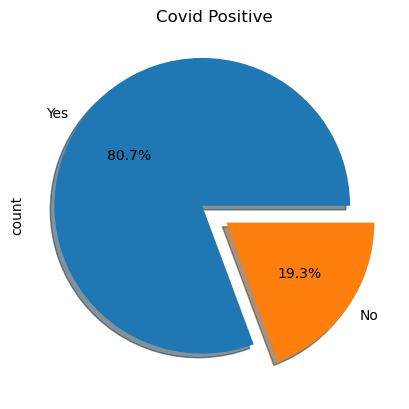

In [9]:
covid_data["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Covid Positive');

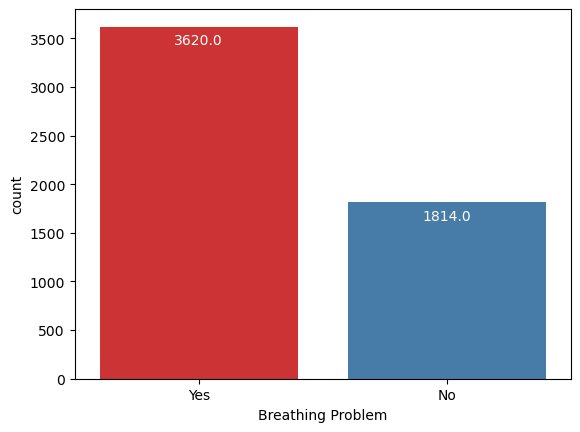

In [11]:
ax = sns.countplot(x='Breathing Problem',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()


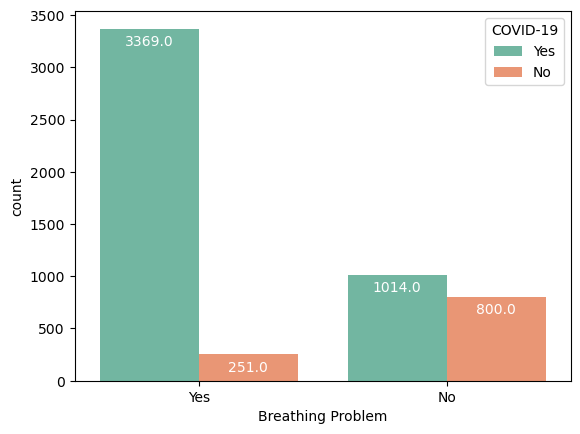

In [12]:
ax = sns.countplot(x='Breathing Problem',hue='COVID-19',data=covid_data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

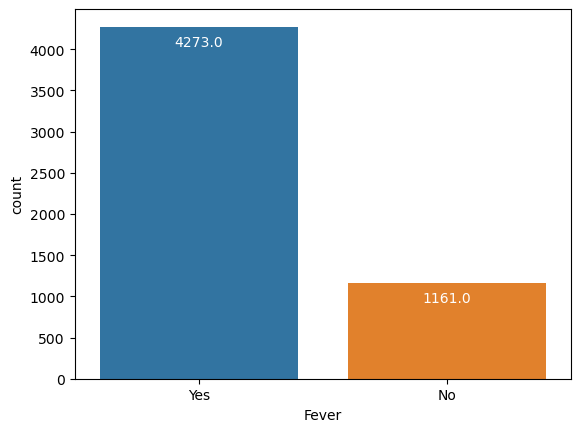

In [13]:
ax = sns.countplot(x='Fever',data=covid_data)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

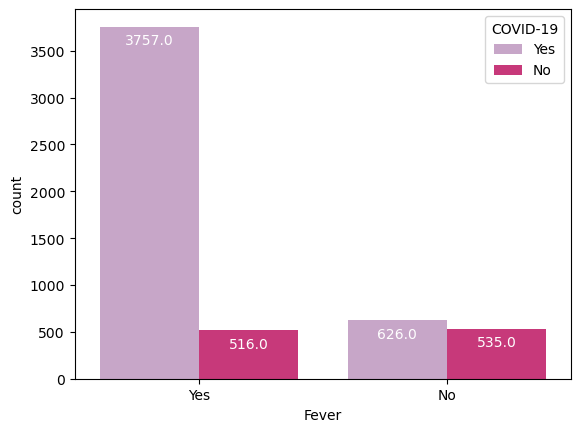

In [14]:
ax = sns.countplot(x='Fever',hue='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

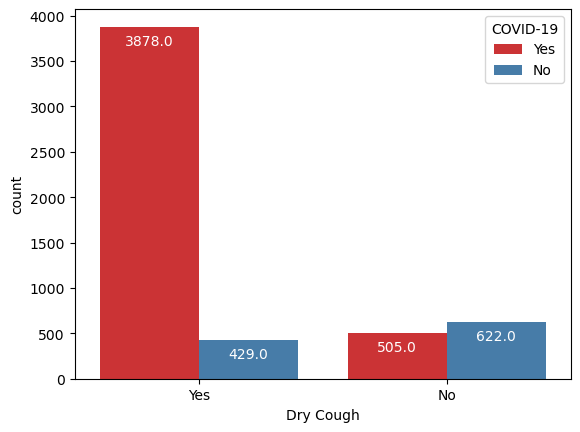

In [15]:
ax = sns.countplot(x='Dry Cough',hue='COVID-19',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

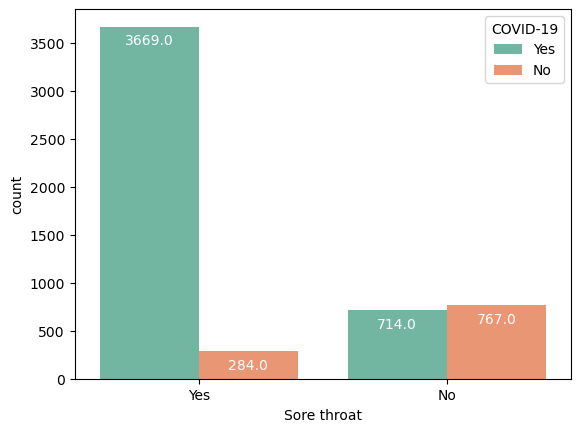

In [16]:
ax = sns.countplot(x='Sore throat',hue='COVID-19',data=covid_data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

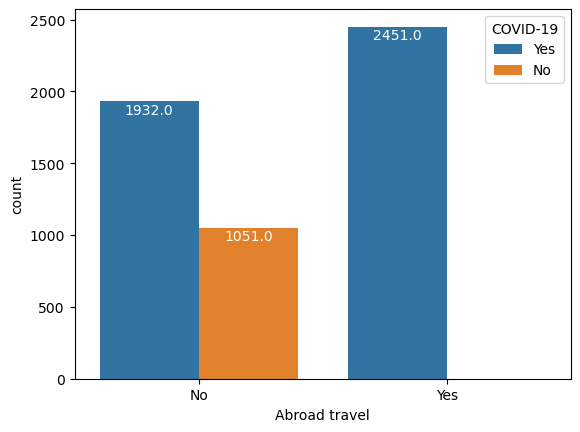

In [17]:
ax = sns.countplot(x='Abroad travel',hue='COVID-19',data=covid_data)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

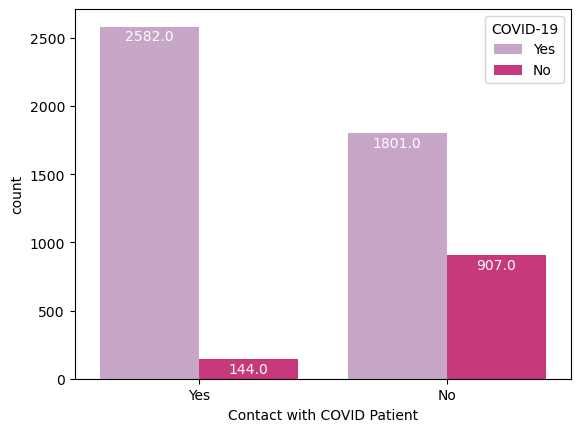

In [18]:
ax = sns.countplot(x='Contact with COVID Patient',hue='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

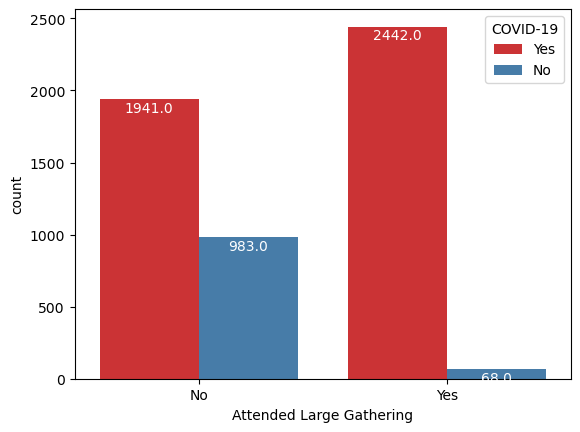

In [19]:
ax = sns.countplot(x='Attended Large Gathering',hue='COVID-19',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

In [20]:
e=LabelEncoder()

In [21]:
covid_data['Breathing Problem']=e.fit_transform(covid_data['Breathing Problem'])
covid_data['Fever']=e.fit_transform(covid_data['Fever'])
covid_data['Dry Cough']=e.fit_transform(covid_data['Dry Cough'])
covid_data['Sore throat']=e.fit_transform(covid_data['Sore throat'])
covid_data['Running Nose']=e.fit_transform(covid_data['Running Nose'])
covid_data['Asthma']=e.fit_transform(covid_data['Asthma'])
covid_data['Chronic Lung Disease']=e.fit_transform(covid_data['Chronic Lung Disease'])
covid_data['Headache']=e.fit_transform(covid_data['Headache'])
covid_data['Heart Disease']=e.fit_transform(covid_data['Heart Disease'])
covid_data['Diabetes']=e.fit_transform(covid_data['Diabetes'])
covid_data['Hyper Tension']=e.fit_transform(covid_data['Hyper Tension'])
covid_data['Abroad travel']=e.fit_transform(covid_data['Abroad travel'])
covid_data['Contact with COVID Patient']=e.fit_transform(covid_data['Contact with COVID Patient'])
covid_data['Attended Large Gathering']=e.fit_transform(covid_data['Attended Large Gathering'])
covid_data['Visited Public Exposed Places']=e.fit_transform(covid_data['Visited Public Exposed Places'])
covid_data['Family working in Public Exposed Places']=e.fit_transform(covid_data['Family working in Public Exposed Places'])
covid_data['Wearing Masks']=e.fit_transform(covid_data['Wearing Masks'])
covid_data['Sanitization from Market']=e.fit_transform(covid_data['Sanitization from Market'])
covid_data['COVID-19']=e.fit_transform(covid_data['COVID-19'])
covid_data['Dry Cough']=e.fit_transform(covid_data['Dry Cough'])
covid_data['Sore throat']=e.fit_transform(covid_data['Sore throat'])
covid_data['Gastrointestinal ']=e.fit_transform(covid_data['Gastrointestinal '])
covid_data['Fatigue ']=e.fit_transform(covid_data['Fatigue '])

In [22]:
covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


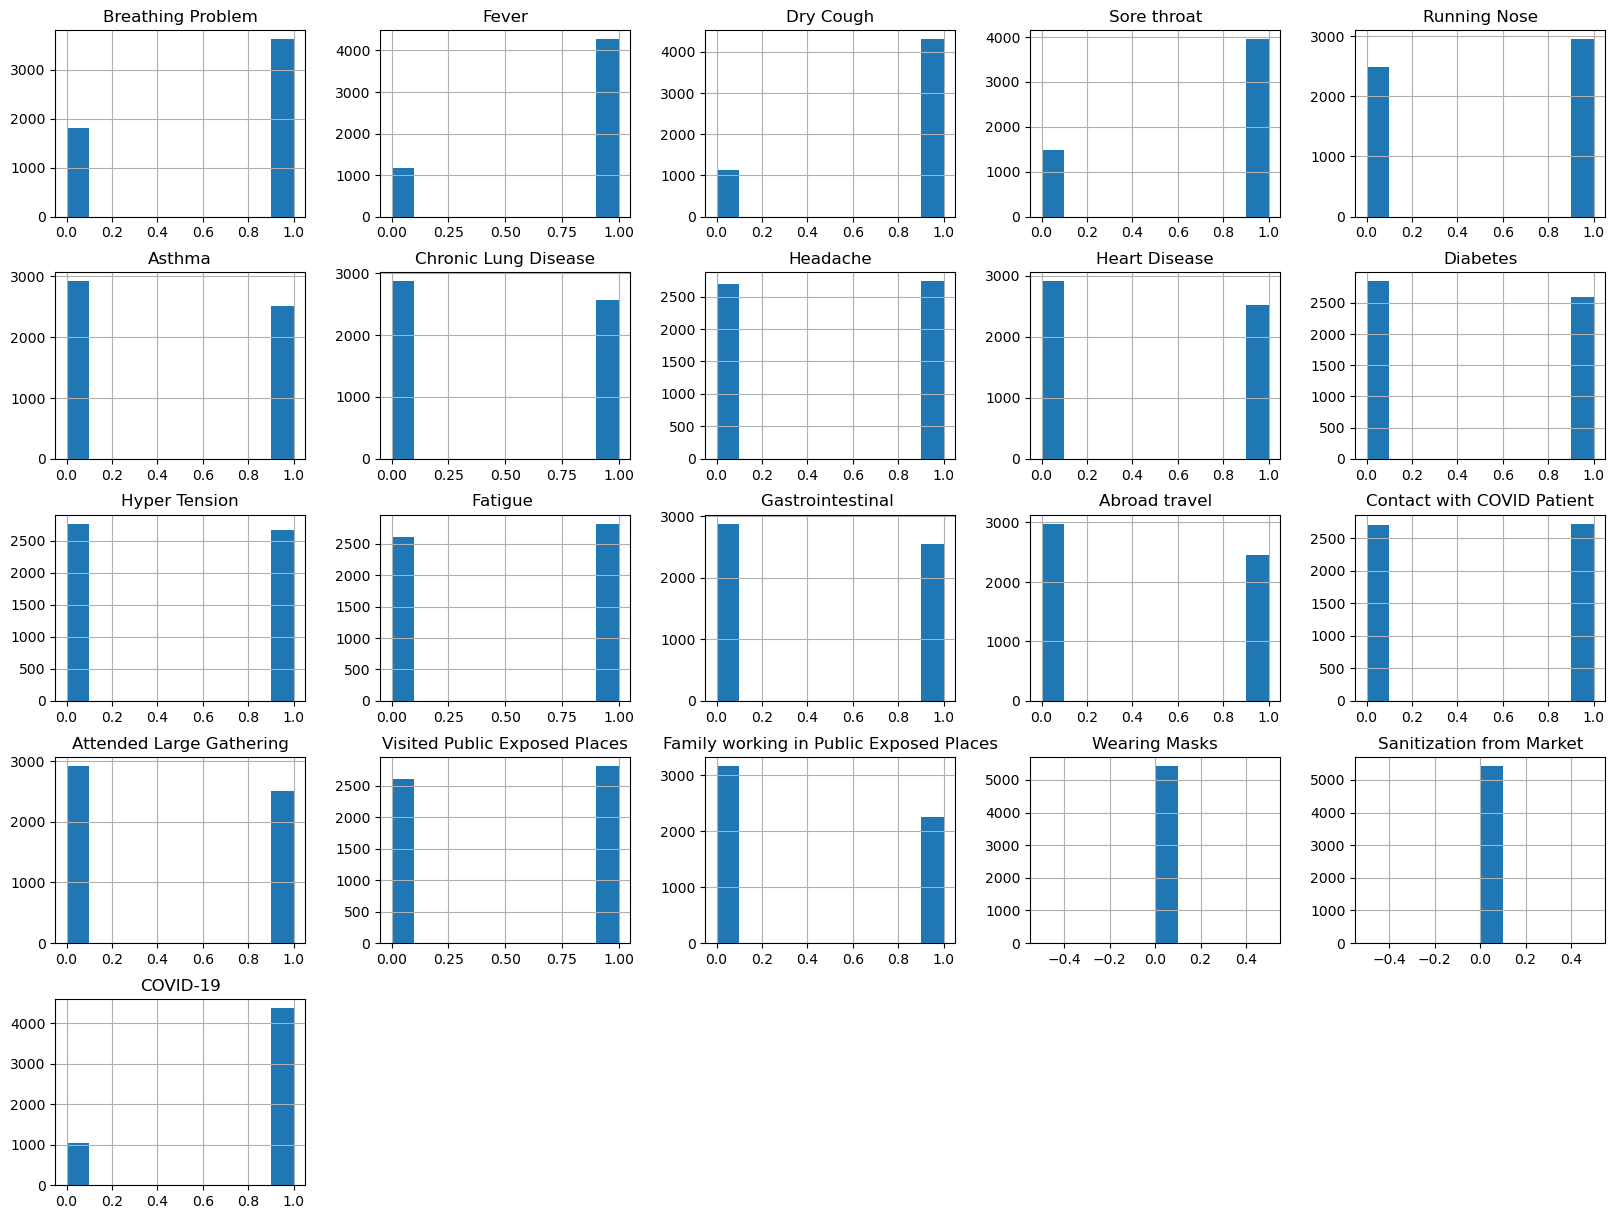

In [23]:
covid_data.hist(figsize=(20,15));

In [24]:
covid_data=covid_data.drop('Wearing Masks',axis=1)
covid_data=covid_data.drop('Sanitization from Market',axis=1)
covid_data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')

<Axes: >

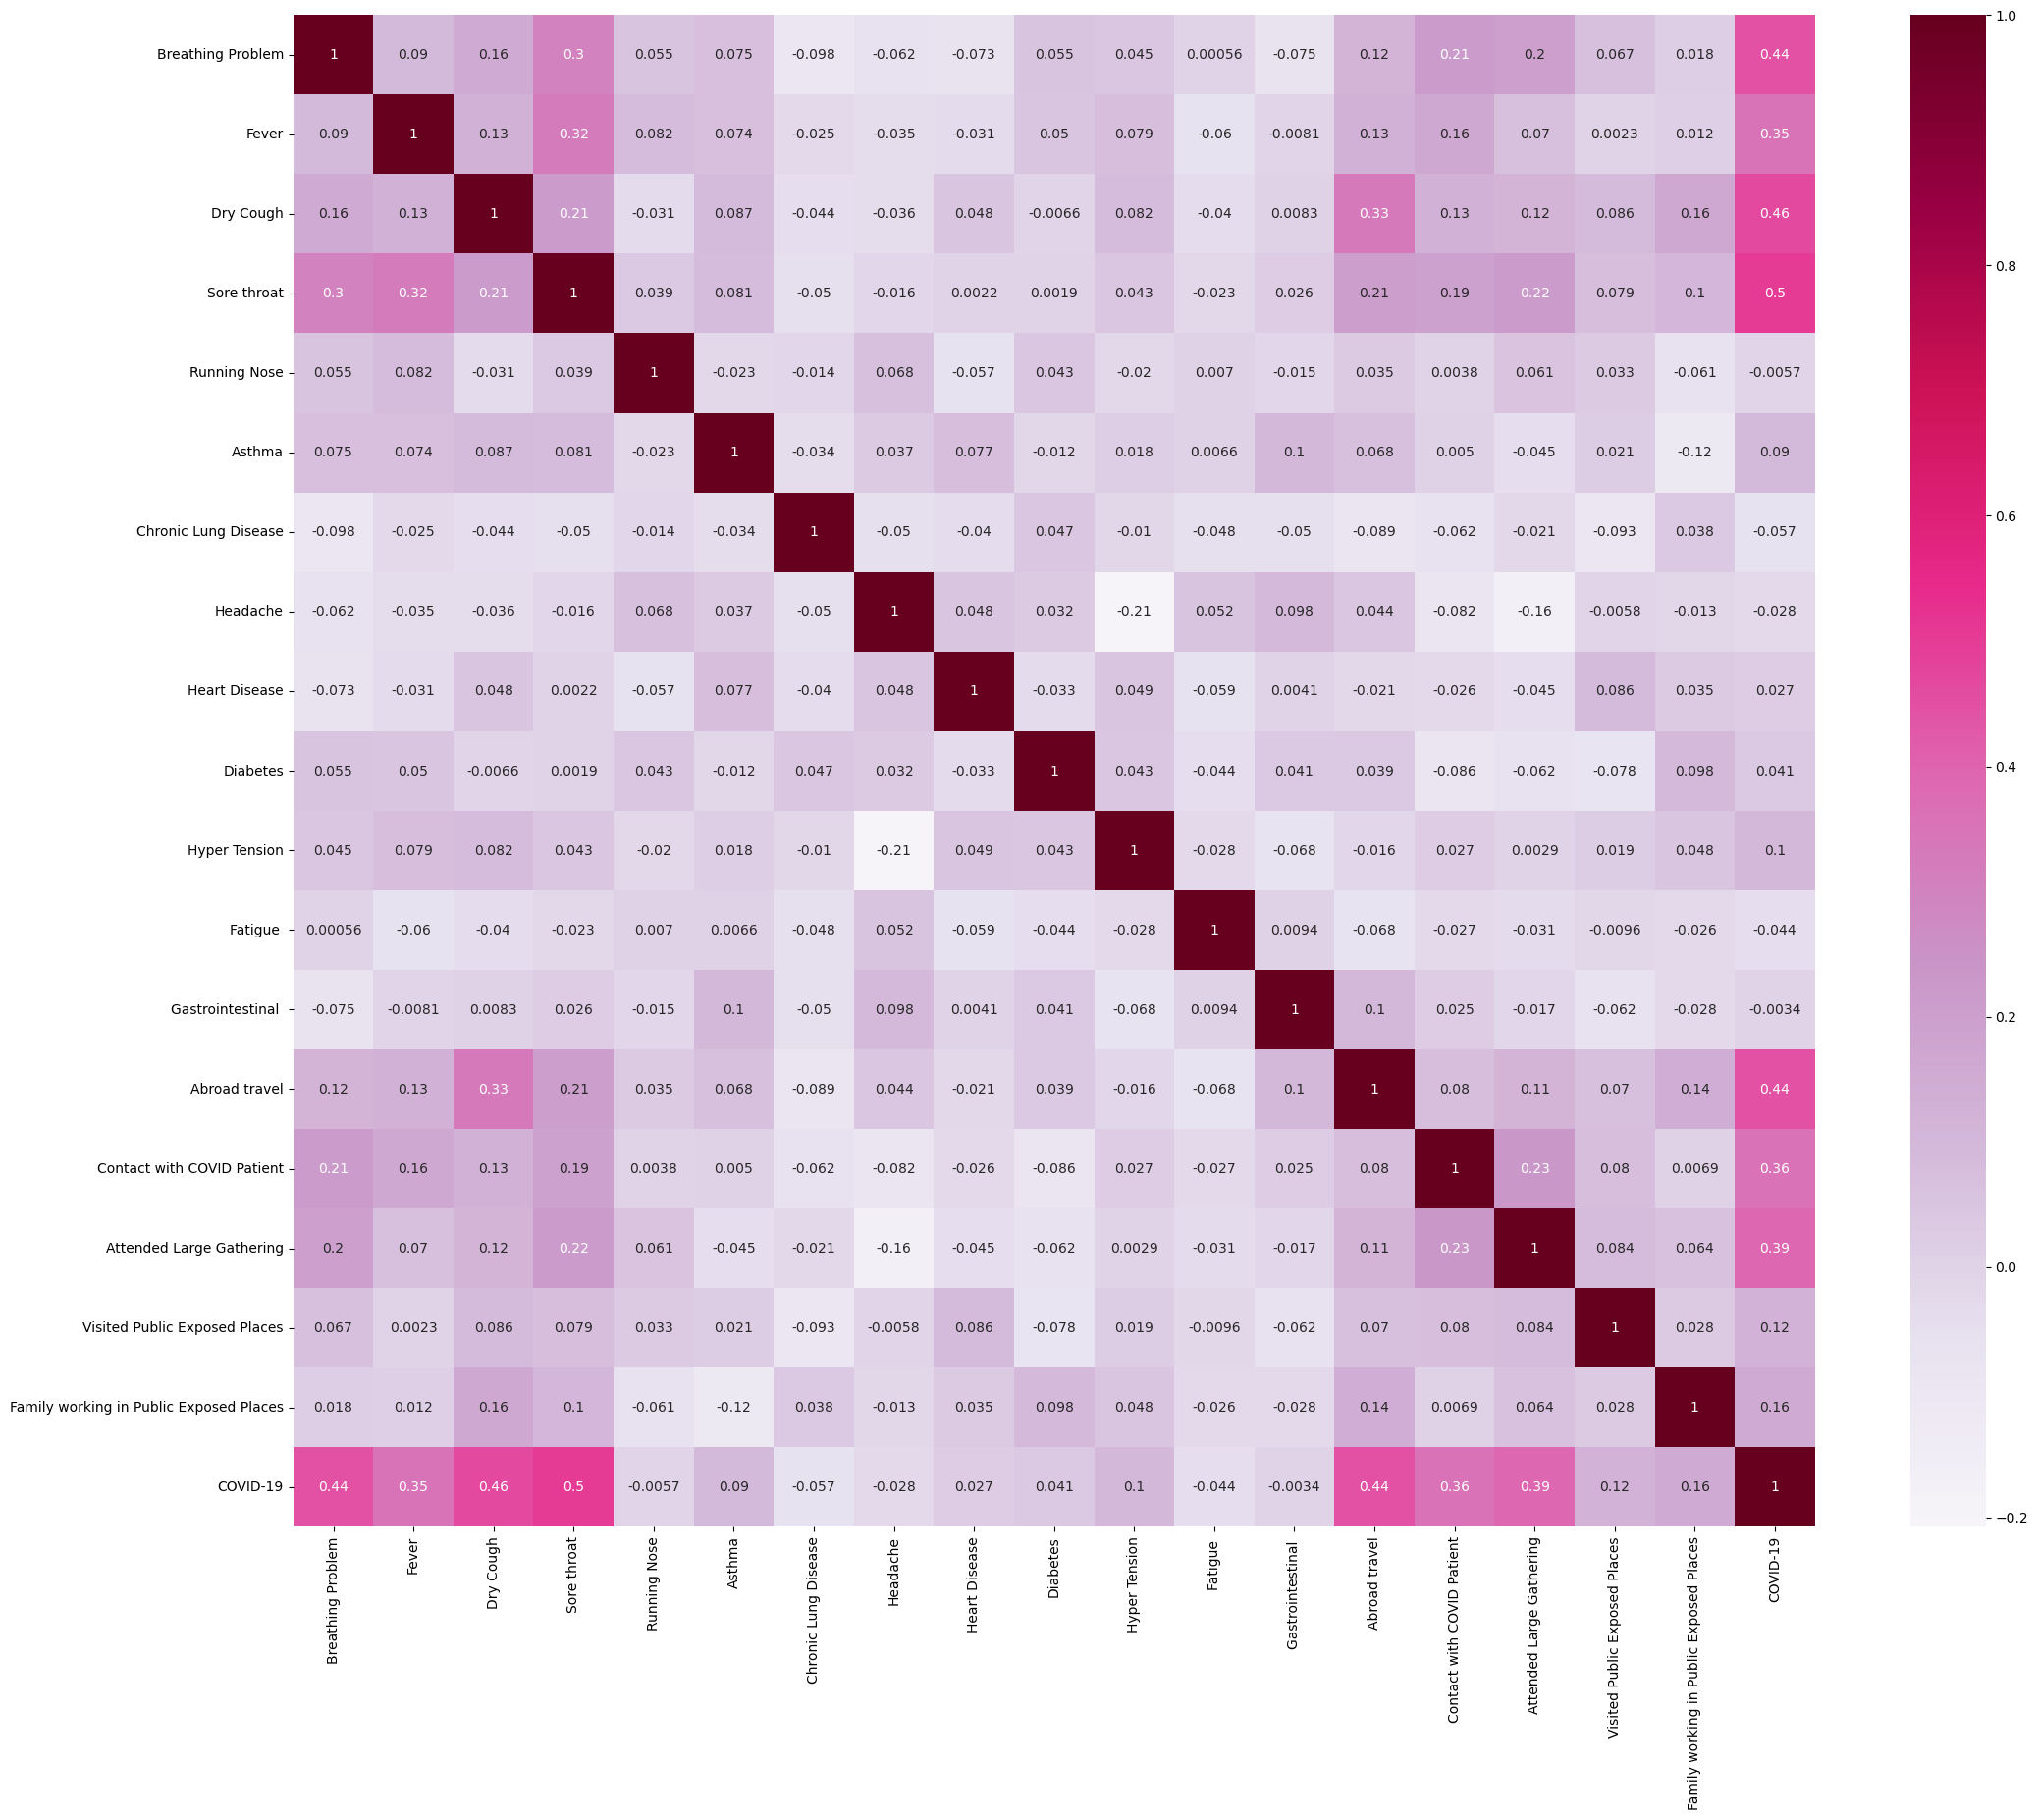

In [25]:
plt.figure(figsize=(25,20))
sns.heatmap(covid_data.corr(), annot=True, cmap="PuRd")

In [26]:
x=covid_data.drop('COVID-19',axis=1)
y=covid_data['COVID-19']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

In [27]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrices(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

In [28]:
def plot_roc_auc_curve(y_true, y_scores, title):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    plt.figure(figsize=(10, 10))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()


SVC
*******Train************
Accuracy:  0.9838969404186796
Precision:  0.9840057484195807
Recall:  0.9838969404186796
F1 Score:  0.9839397485355798
*******Test************
Accuracy:  0.9779208831646734
Precision:  0.9782585077114916
Recall:  0.9779208831646734
F1 Score:  0.9780432419066873

 



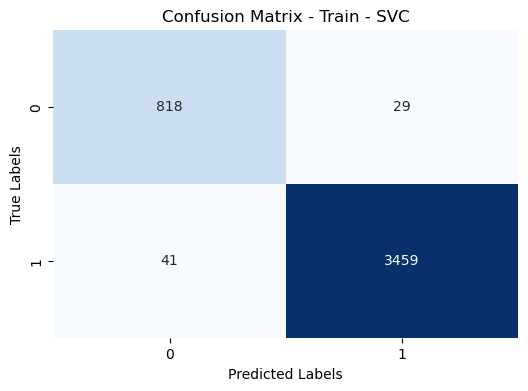

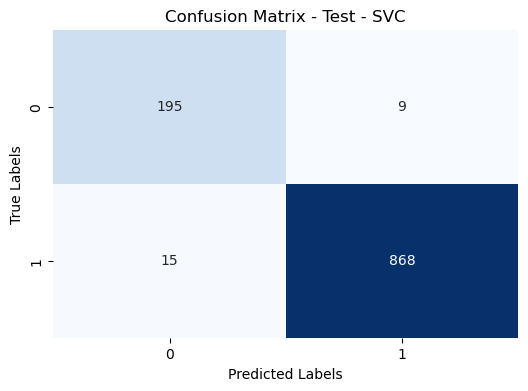

LogisticRegression
*******Train************
Accuracy:  0.9703243616287095
Precision:  0.9700799964385639
Recall:  0.9703243616287095
F1 Score:  0.9699129459596836
*******Test************
Accuracy:  0.9696412143514259
Precision:  0.9694836733407873
Recall:  0.9696412143514259
F1 Score:  0.9690613777881323

 



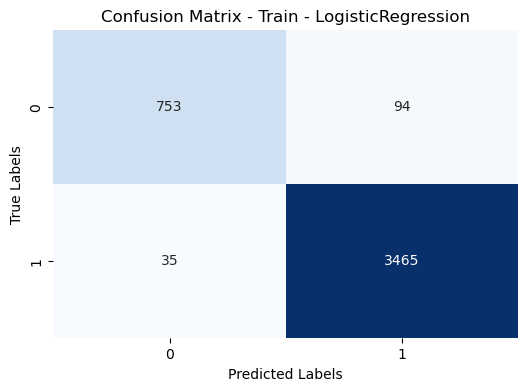

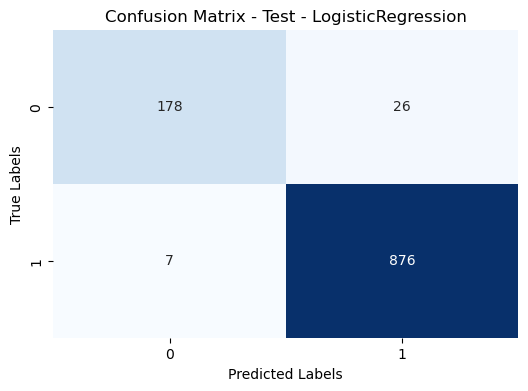

DecisionTreeClassifier
*******Train************
Accuracy:  0.9845870715435933
Precision:  0.9850508868006964
Recall:  0.9845870715435933
F1 Score:  0.9847108460386198
*******Test************
Accuracy:  0.9751609935602575
Precision:  0.9761670275813047
Recall:  0.9751609935602575
F1 Score:  0.9754523923808138

 



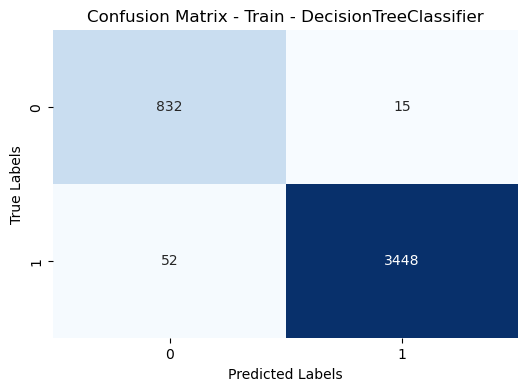

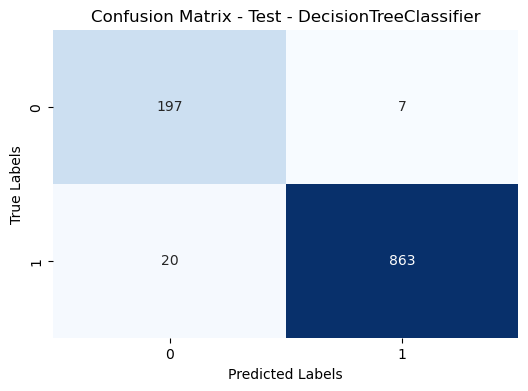

RandomForestClassifier
*******Train************
Accuracy:  0.9845870715435933
Precision:  0.9850508868006964
Recall:  0.9845870715435933
F1 Score:  0.9847108460386198
*******Test************
Accuracy:  0.9751609935602575
Precision:  0.9761670275813047
Recall:  0.9751609935602575
F1 Score:  0.9754523923808138

 



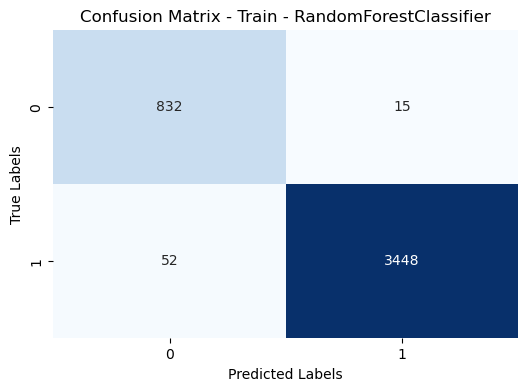

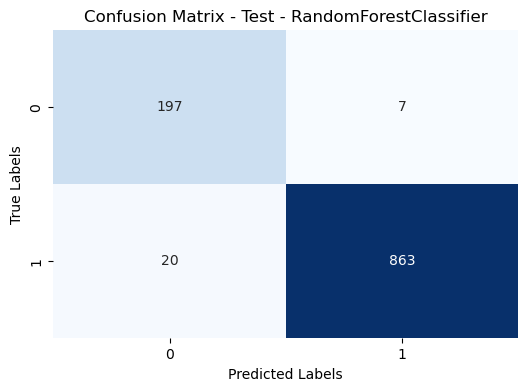

GaussianNB
*******Train************
Accuracy:  0.7527030135725787
Precision:  0.8910194862101842
Recall:  0.7527030135725787
F1 Score:  0.7782725572044498
*******Test************
Accuracy:  0.7488500459981601
Precision:  0.8925899567790873
Recall:  0.7488500459981601
F1 Score:  0.7762288746598204

 



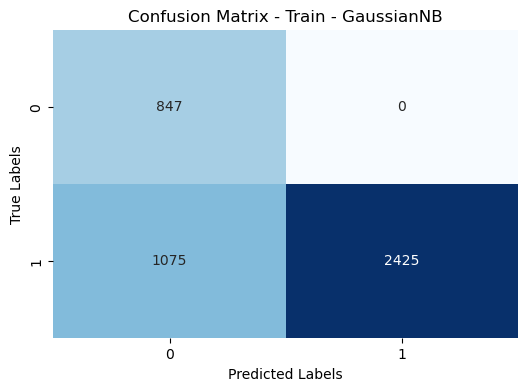

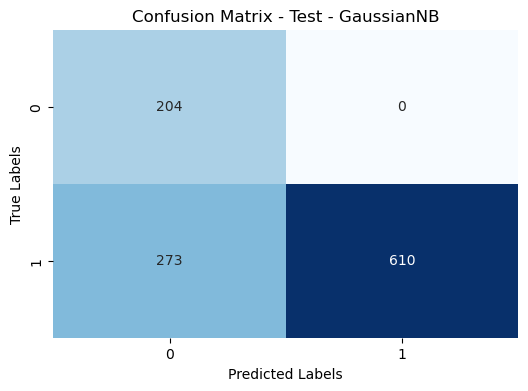

KNeighborsClassifier
*******Train************
Accuracy:  0.9834368530020704
Precision:  0.9835264752367023
Recall:  0.9834368530020704
F1 Score:  0.9834736060408813
*******Test************
Accuracy:  0.9770009199632015
Precision:  0.9772786605947017
Recall:  0.9770009199632015
F1 Score:  0.9771074889797107

 



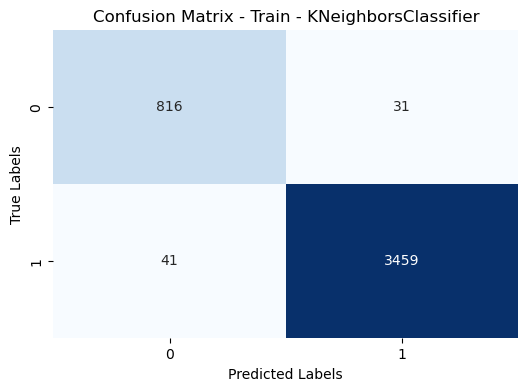

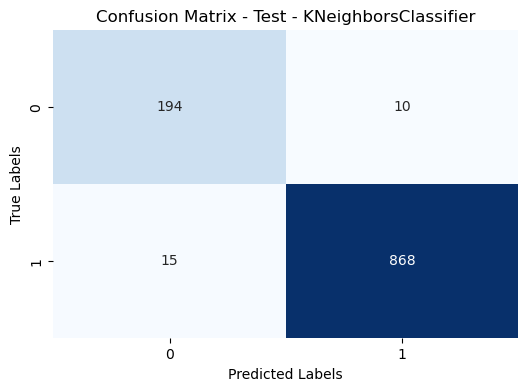

In [39]:
models = [SVC(),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB(),KNeighborsClassifier()]
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1s = []
model_names = []
for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print(type(model).__name__)
    model_names.append(type(model).__name__)
    print("*******Train************")
    print("Accuracy: ",accuracy_score(y_train,train_pred))
    print("Precision: ",precision_score(y_train,train_pred, average='weighted'))
    print("Recall: ",recall_score(y_train,train_pred,average='weighted'))
    print("F1 Score: ",f1_score(y_train,train_pred,average='weighted'))
    train_accuracies.append(accuracy_score(y_train,train_pred))
    train_precisions.append(precision_score(y_train,train_pred,average='weighted'))
    train_recalls.append(recall_score(y_train,train_pred,average='weighted'))
    train_f1s.append(f1_score(y_train,train_pred,average='weighted'))

    print("*******Test************")
    print("Accuracy: ",accuracy_score(y_test,test_pred))
    print("Precision: ",precision_score(y_test,test_pred, average='weighted'))
    print("Recall: ",recall_score(y_test,test_pred,average='weighted'))
    print("F1 Score: ",f1_score(y_test,test_pred,average='weighted'))
    test_accuracies.append(accuracy_score(y_test,test_pred))
    test_precisions.append(precision_score(y_test,test_pred,average='weighted'))
    test_recalls.append(recall_score(y_test,test_pred,average='weighted'))
    test_f1s.append(f1_score(y_test,test_pred,average='weighted'))
    print("\n \n")
    # Calculate and display the confusion matrix for training data
    plot_confusion_matrices(y_train, train_pred, f"Confusion Matrix - Train - {type(model).__name__}")

    # Calculate and display the confusion matrix for testing data
    plot_confusion_matrices(y_test, test_pred, f"Confusion Matrix - Test - {type(model).__name__}")

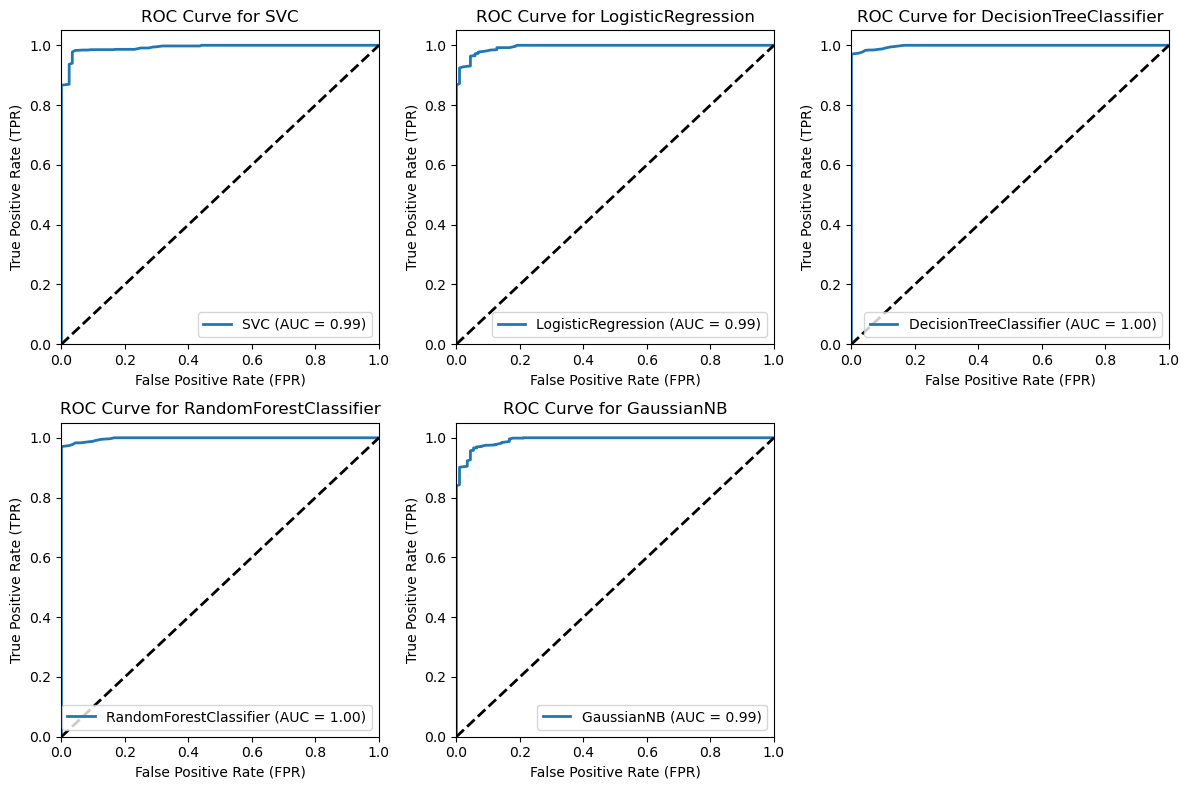

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Define your training and testing data (x_train, x_test, y_train, y_test) here

models = [SVC(probability=True), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB()]

# Calculate the number of rows and columns for subplots
num_rows = len(models) // 2
num_cols = 2 if len(models) % 2 == 0 else 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes for easy iteration
axes = axes.flatten()

for i, model in enumerate(models):
    model_name = type(model).__name__

    model.fit(x_train, y_train)

    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(x_test)
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1], pos_label=1)
    elif isinstance(model, KNeighborsClassifier):
        # For K-Nearest Neighbors, calculate probabilities based on distances to neighbors
        distances, indices = model.kneighbors(x_test)
        neighbor_labels = y_train[indices]
        # Assign a probability score based on the majority class of neighbors
        y_pred_prob = np.mean(neighbor_labels, axis=1)
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    else:
        raise ValueError("Model not supported for ROC curve calculation.")

    # Calculate ROC-AUC score
    roc_auc = auc(fpr, tpr)

    # Create a subplot for each model
    ax = axes[i]
    ax.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], 'k--', lw=2)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
    ax.set_title(f'ROC Curve for {model_name}')
    ax.legend(loc='lower right')

# Hide any empty subplots
for i in range(len(models), len(axes)):
    axes[i].axis('off')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


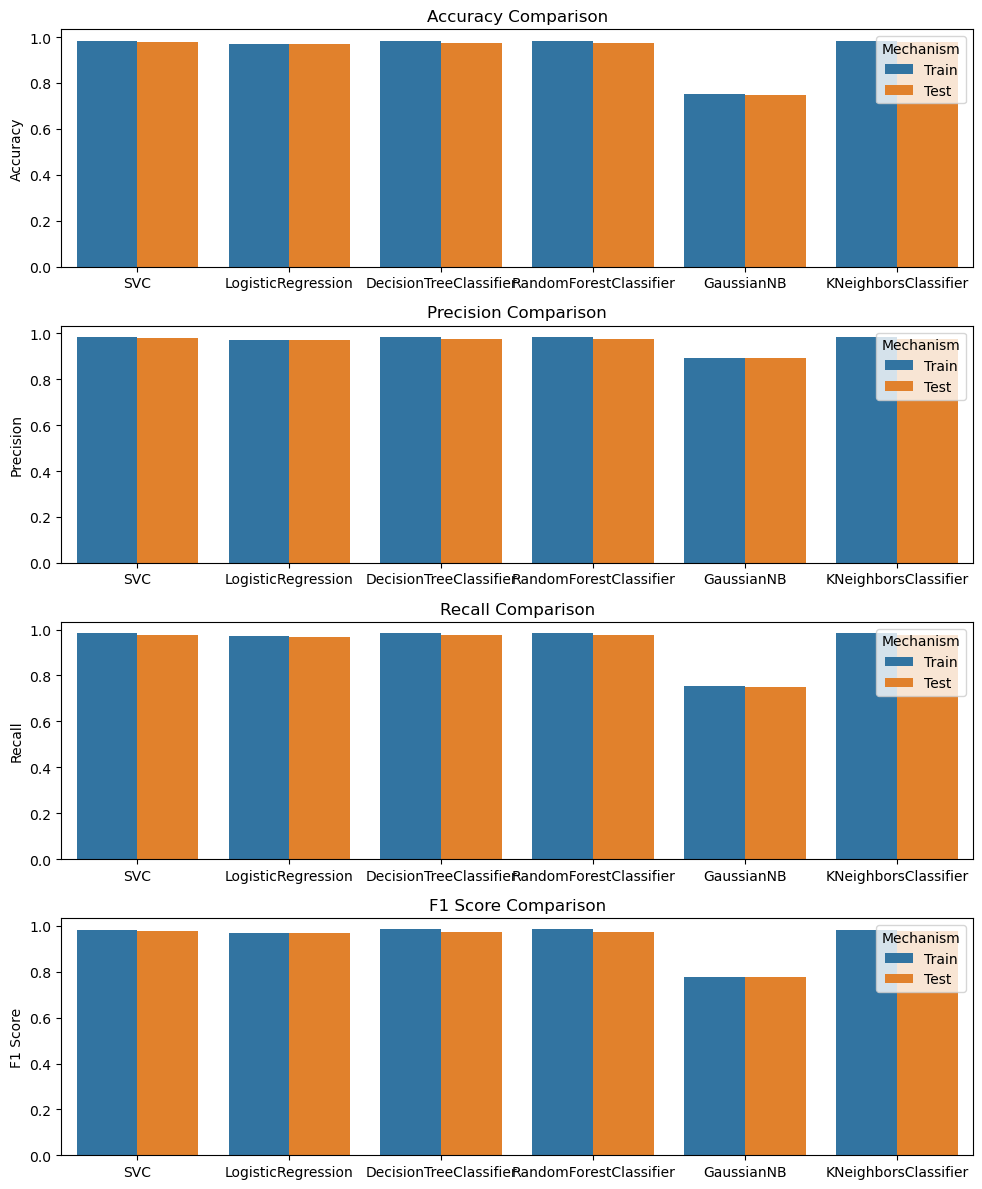

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create separate DataFrames for train and test results
train_result_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': train_accuracies,
    'Precision': train_precisions,
    'Recall': train_recalls,
    'F1 Score': train_f1s,
    'Mechanism': ['Train'] * len(models)
})

test_result_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': test_accuracies,
    'Precision': test_precisions,
    'Recall': test_recalls,
    'F1 Score': test_f1s,
    'Mechanism': ['Test'] * len(models)
})

# Combine train and test DataFrames
result_df = pd.concat([train_result_df, test_result_df])

# Set up subplots with 3 rows and 1 column
fig, axes = plt.subplots(4, 1, figsize=(10, 12))

# Define metrics to iterate through
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create separate bar plots for each metric
for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.barplot(data=result_df, x='Model', y=metric, hue='Mechanism', ax=ax)
    ax.set_title(f'{metric} Comparison')
    ax.set_xlabel('')
    ax.set_ylabel(metric)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

